In [46]:
#!pip install pennylane-qiskit

In [ ]:
import qiskit
import pennylane as qml
from pennylane import numpy as np
import qiskit.providers.aer.noise as noise
import matplotlib.pyplot as plt

In [41]:
# create a bit flip error with probability p = 0.01
p = 0.4
my_bitflip = noise.pauli_error([('X', p), ('I', 1 - p)])

# create an empty noise model
my_noise_model = noise.NoiseModel()

# attach the error to the hadamard gate 'h'
my_noise_model.add_quantum_error(my_bitflip, ['h'], [0])

dev4 = qml.device('qiskit.aer', wires=4, noise_model = my_noise_model)

@qml.qnode(dev4)
def bitflip_circuit_aer():
    qml.Hadamard(0) 
    return qml.probs(wires=0)

In [42]:
print(bitflip_circuit_aer())

[0.47265625 0.52734375]


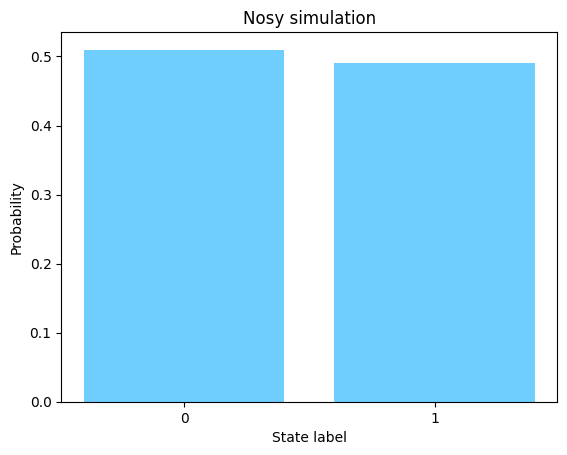

In [43]:
bit_strings = ['0', '1']

plt.bar(bit_strings, bitflip_circuit_aer() , color = "#70CEFF")

#plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability")
plt.title("Nosy simulation")
plt.show()

[0.5 0.5]


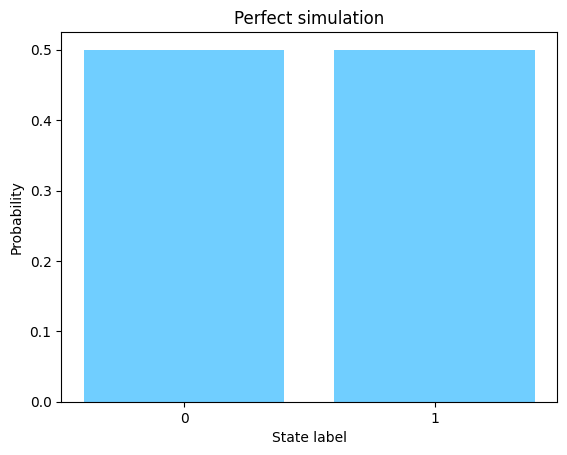

In [45]:
dev4 = qml.device("default.qubit", wires=1)

@qml.qnode(dev4)
def bitflip_circuit():
    qml.Hadamard(0)
    return qml.probs(wires=0)

print(bitflip_circuit())

bit_strings = ['0', '1']

plt.bar(bit_strings, bitflip_circuit() , color = "#70CEFF")

plt.xlabel("State label")
plt.ylabel("Probability")
plt.title("Perfect simulation")
plt.show()